In [1]:
#| include: false
# all_no_test

In [2]:
#| include: false
# no_test
! [ -e /content ] && pip install -Uqq geowrangler2

In [3]:
#| include: false
# no_test
!mkdir -p ../data
![ -e /content ] && ln -s ../data .

In [4]:
#| include: false
# no_test
!mkdir -p ../data
# download sample geojson files from repo

In [5]:
#| include: false
# no_test
%reload_ext autoreload
%autoreload 2
%matplotlib inline

> A basic introduction to Vector to Raster mask and Raster to Dataframe.

## Basic Usage

Generate a raster mask from a reference TIF image based on the labels assigned to certain regions of the area. The generated raster mask can also be used to convert the raster to a dataframe with respect to their assigned labels. 

Terms:
* **raster mask** - processed image wherein some parts of it are set to no value or in other words *hidden*
* **labels** - parts of an area within the satellite image are categorized as such. Examples are mining, agriculture, etc.

In [6]:
#| include: false
# no_test
!mkdir -p ../data
# download sample geojson files from repo
![ ! -e ../data/region34ncr_admin.geojson ] && curl -s -o ../data/region34ncr_admin.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler2/master/data/vector_to_raster_mask_sample/cabanglasan.tif
![ ! -e ../data/region3_admin_grids.geojson ] && curl -s -o ../data/region3_admin_grids.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler2/master/data/vector_to_raster_mask_sample/labels_20220816.gpkg

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

import geowrangler2.vector_to_raster_mask as vrm
import geowrangler2.raster_to_dataframe as rdf

In [8]:
from rasterio import features
from rasterio.plot import show
from rasterio.windows import Window, transform

### Load reference raster image and shape file

The shape file that should be loaded should contain a column that consists of labels. 

In [9]:
tiff_file = "../data/vector_to_raster_mask_sample/cabanglasan.tif"
shape_file = "../data/vector_to_raster_mask_sample/labels_20220816.gpkg"
target_file = shape_file.replace("gpkg", "tiff")

We create a dictionary of our target labels that we want to create a raster mask for.

In [10]:
labels = {
    "mining": 1,
    "neg": 2,
    "agriculture": 3,
    "product_extraction": 4,
    "kaingin": 5,
    "biophysical": 6,
}

### Generate raster mask

To create the mask we input the reference raster image, shape file with labels, and the dictionary with our target labels into the function.

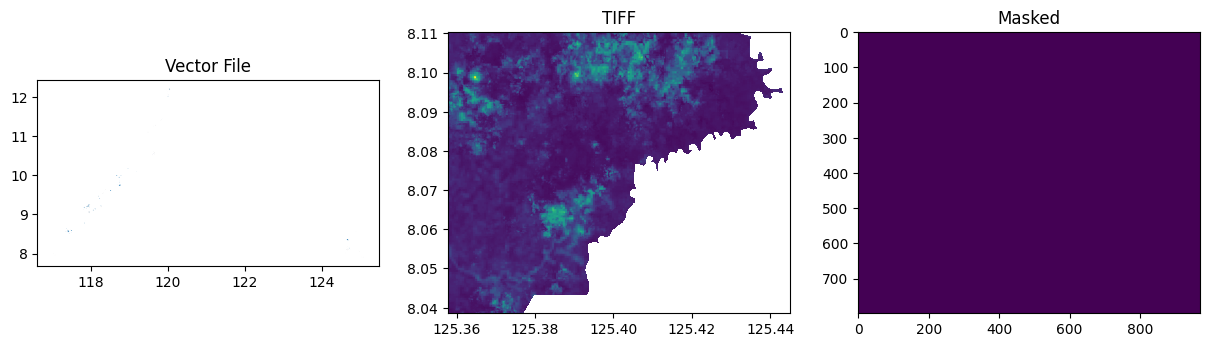

In [11]:
# Generate masks for a file
masks, grids, values = vrm.generate_mask(
    tiff_file=tiff_file,
    shape_file=shape_file,
    output_file=target_file,
    labels_column="label",
    labels_dict=labels,
    plot=True,
)

### Load rasters and the outputed raster mask

In [12]:
# no_test
tiff_files = [
    "../data/vector_to_raster_mask_sample/cabanglasan.tif",
]
mask_file = "../data/vector_to_raster_mask_sample/labels_20220816.tiff"

### Convert raster to dataframe

To convert raster/s to a dataframe, we just need to input the images into the function and add the mask file. The mask file will be used to create the last column `label` in the dataframe. The result is a tabular dataset that contains the Band values per raster image and their labels.

In [13]:
data = rdf.read_bands(tiff_files, mask_file)

In [14]:
data

B1_0     B2_0     B3_0    B4_0     B5_0     B6_0    B7_0     B8_0  \
0       0.1198  0.09635  0.09330  0.0698  0.10665  0.20250  0.2490  0.23525   
1       0.1198  0.09580  0.09245  0.0708  0.10665  0.20250  0.2490  0.23925   
2       0.1148  0.09420  0.09460  0.0707  0.10380  0.20395  0.2478  0.23150   
3       0.1148  0.09190  0.08850  0.0631  0.10380  0.20395  0.2478  0.23300   
4       0.1148  0.09350  0.09080  0.0643  0.10565  0.20830  0.2466  0.24205   
...        ...      ...      ...     ...      ...      ...     ...      ...   
775824  0.0000  0.00000  0.00000  0.0000  0.00000  0.00000  0.0000  0.00000   
775825  0.0000  0.00000  0.00000  0.0000  0.00000  0.00000  0.0000  0.00000   
775826  0.0000  0.00000  0.00000  0.0000  0.00000  0.00000  0.0000  0.00000   
775827  0.0000  0.00000  0.00000  0.0000  0.00000  0.00000  0.0000  0.00000   
775828  0.0000  0.00000  0.00000  0.0000  0.00000  0.00000  0.0000  0.00000   

           B9_0   B10_0    B11_0   B12_0  label  
0       0.28125  0.0377  0.19925  0.1002      0  
1       0.28125  0.0377  0.19925  0.1002      0  
2       0.27165  0.0385  0.18240  0.0902      0  
3       0.27165  0.0385  0.18240  0.0902      0  
4       0.26990  0.0385  0.18050  0.0894      0  
...         ...     ...      ...     ...    ...  
775824  0.00000  0.0000  0.00000  0.0000      0  
775825  0.00000  0.0000  0.00000  0.0000      0  
775826  0.00000  0.0000  0.00000  0.0000      0  
775827  0.00000  0.0000  0.00000  0.0000      0  
775828  0.00000  0.0000  0.00000  0.0000      0  

[775829 rows x 13 columns]

Checking the `label` column we can see that the TIF image that we converted does not contain the desired labels.

In [15]:
data["label"].unique()

array([0], dtype=uint16)